In [1]:
# https://docs.wradlib.org/en/stable/installation.html 
# ENABLE ENVIRONMENT FIRST!
# Environment Access via Anaconda Navigator
import wradlib as wrl
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

In [13]:
def read_radolan(radfile):
    radfile = wrl.util.get_wradlib_data_file('' + radfile)
    return wrl.io.read_radolan_composite(radfile)

In [39]:
import os
# Path to DATA location (Change to match Crwaler )
os.environ["WRADLIB_DATA"] = r"/data_hdd/Radardaten/minutely/uncompressed/2016"

#### Grid 
See [RADOLAN GRID](https://docs.wradlib.org/en/stable/notebooks/radolan/radolan_grid.html)

Recommended Source: 
RX/WX: original radardata in qualitative RVP6-units (1 byte coded)  <- USED <br>
RZ: radardata after correction of PBB converted to rainrate with improved Z-R-relation <br>
RY: radardata after correction with Quality-comp osit (QY) <br>

[RADOLAN-Produktübersicht](https://www.dwd.de/DE/leistungen/radolan/produktuebersicht/radolan_produktuebersicht_pdf.pdf?__blob=publicationFile&v=6)



In [15]:
radolan_grid_ll = wrl.georef.get_radolan_grid(1100,900, wgs84=True)

print("{0}, ({1:.4f}, {2:.4f})".format(radolan_grid_ll.shape, *radolan_grid_ll[156,377]))
#156,377
    
       
    #lats = [47.66033]
    #lons = [9.17582]

(1100, 900, 2), (9.1727, 47.6621)


In [60]:
def plot_radolan(data, attrs, grid, clabel=None):
    fig = pl.figure(figsize=(9,11))
    ax = fig.add_subplot(111, aspect='equal')
    x = grid[:,:,0]
    y = grid[:,:,1]
    
    #Add plot to map
    plot_cities(ax)
    pm = ax.pcolormesh(x, y, data, cmap='viridis')
    pl.axis('off')
    pl.savefig('/data/DeepRain/Data/Location Konstanz/Location.png', dpi=100)

In [61]:
def plot_cities(ax):
    radolan_grid_xy = wrl.georef.get_radolan_grid(1100,900)
    print("{0}, ({1:.4f}, {2:.4f})".format(radolan_grid_xy.shape, *radolan_grid_xy[156,377,:]))
     #57,445\n
    radolan_grid_ll = wrl.georef.get_radolan_grid(1100,900, wgs84=True)
    print("{0}, ({1:.4f}, {2:.4f})".format(radolan_grid_ll.shape, *radolan_grid_ll[156,377,:])),
    #Add rescaled params to map?\n",
    lats = [-4602.6447]
    lons = [-66.4622]
    cities = ['Konstanz']
    for lon, lat, city in zip(lons, lats, cities):
        ax.plot(lon, lat, 'ro', zorder=1)
        ax.text(lon + 0.01, lat + 0.01, city, fontsize='large',color='white')

(1100, 900, 2), (-66.4622, -4602.6447)
(1100, 900, 2), (9.1727, 47.6621)


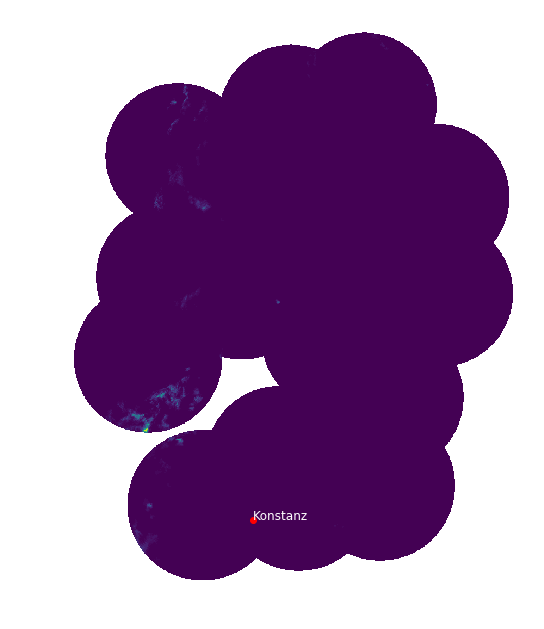

In [62]:
for subdir, dirs, files in os.walk(os.environ["WRADLIB_DATA"]):
    for file in files:
        if '.png' in file:
            continue
        data, attrs = read_radolan(file)
        data = np.ma.masked_equal(data, -9999)
        plot_radolan(data, attrs, radolan_grid_xy)
        break;